In [18]:
import numpy as np
import pandas as pd

# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder

# data balancing lib
from imblearn.over_sampling import SMOTE

sns.set()

In [22]:
df = pd.read_csv('../data/customer_churn.csv')
df.set_index('customerID', inplace=True)

In [23]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,DailyCharges,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,2.186667,Mailed check,65.6,593.30
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,1.996667,Mailed check,59.9,542.40
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,2.463333,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.266667,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,2.796667,Mailed check,83.9,267.40


# Encoding categorical data

In [26]:
categorical_features = df.select_dtypes('object').columns

In [41]:
binary_data = df[['Churn', 'gender', 'SeniorCitizen', 'Partner', 
                  'Dependents', 'PhoneService', 'PaperlessBilling']]

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
0003-MKNFE,No,Male,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check
0004-TLHLJ,Yes,Male,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
0011-IGKFF,Yes,Male,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
0013-EXCHZ,Yes,Female,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,Female,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check
9992-RRAMN,Yes,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
9992-UJOEL,No,Male,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check


In [56]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder(drop='if_binary')
  
# Passing encoded columns
enc.fit_transform(df['gender'].values.reshape(len(df), 1)).toarray()

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [55]:
enc.categories_

[array(['Female', 'Male'], dtype=object)]

In [48]:
col_names = []

for i in enc.categories_:
    for j in i:
        col_names.append(j)

In [49]:
enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [44]:
pd.DataFrame(enc.transform(df[categorical_features]).toarray(), columns=col_names)

ValueError: Shape of passed values is (7043, 37), indices imply (7043, 43)

# Assessing and correcting target imbalance

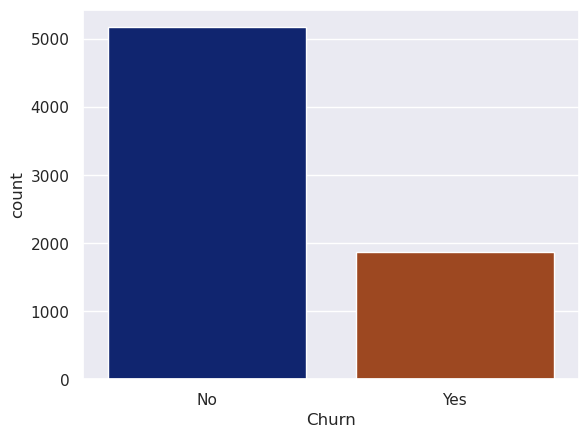

In [16]:
sns.countplot(x='Churn', data=df, palette='dark');

## Using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#r001eabbe5dd7-1) to balance the target variable

In [25]:
sm = SMOTE(random_state=42)
X, y = df.drop('Churn', axis=1), df['Churn']
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

ValueError: could not convert string to float: 'Female'